In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
import pathlib 

In [15]:
DATA_CSV = pathlib.Path("../data/processed/metadata_balanced.csv")
AUDIO_ROOT = pathlib.Path("../")

In [16]:
df = pd.read_csv(DATA_CSV)
print("Rows:", len(df))
print(df.head())

Rows: 11800
                                            filepath emotion
0  C:/Users/lenovo/Anomaly detection Project/Emot...   angry
1  C:/Users/lenovo/Anomaly detection Project/Emot...   angry
2  C:/Users/lenovo/Anomaly detection Project/Emot...   angry
3  C:/Users/lenovo/Anomaly detection Project/Emot...   angry
4  C:/Users/lenovo/Anomaly detection Project/Emot...   angry


<Axes: xlabel='count', ylabel='emotion'>

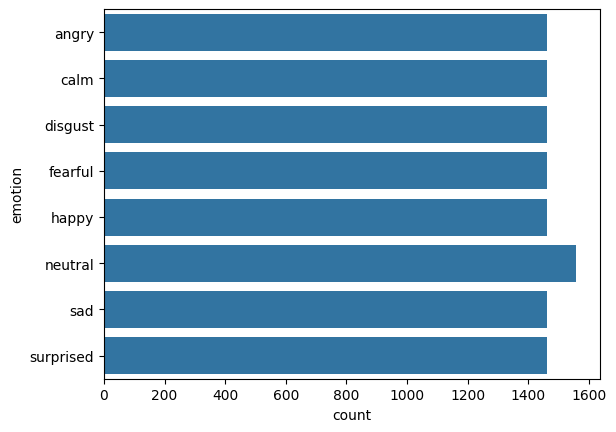

In [17]:
sns.countplot(df['emotion'])

In [18]:
raw_path = df['filepath'].iloc[0]
wav_path = pathlib.Path("..") / raw_path
# wav_path
display(Audio(filename=wav_path))

In [19]:
emotion_count = df['emotion'].value_counts()
emotion_count

emotion
neutral      1559
angry        1463
disgust      1463
calm         1463
fearful      1463
happy        1463
sad          1463
surprised    1463
Name: count, dtype: int64

In [20]:
def waveplot(ax, data, sr, emotion):
    ax.set_title(f"Waveplot emotion",fontsize = 20)
    librosa.display.waveshow(data,sr= sr,ax= ax)

def spectrogram(ax, data, sr, emotion):
    S = librosa.stft(data)
    S_db = librosa.amplitude_to_db(abs(S))
    img = librosa.display.specshow(S_db, sr=sr,
                                   x_axis='time', y_axis='hz', ax=ax)
    ax.set_title(f"Spectrogram – {emotion}", fontsize=12)
    plt.colorbar(img, ax=ax, format="%+2.0f dB")

C:/Users/lenovo/Anomaly detection Project/Emotional-aware-chatbot/data/processed/balanced_dataset/angry_crema_d_1001_ieo_ang_hi.wav


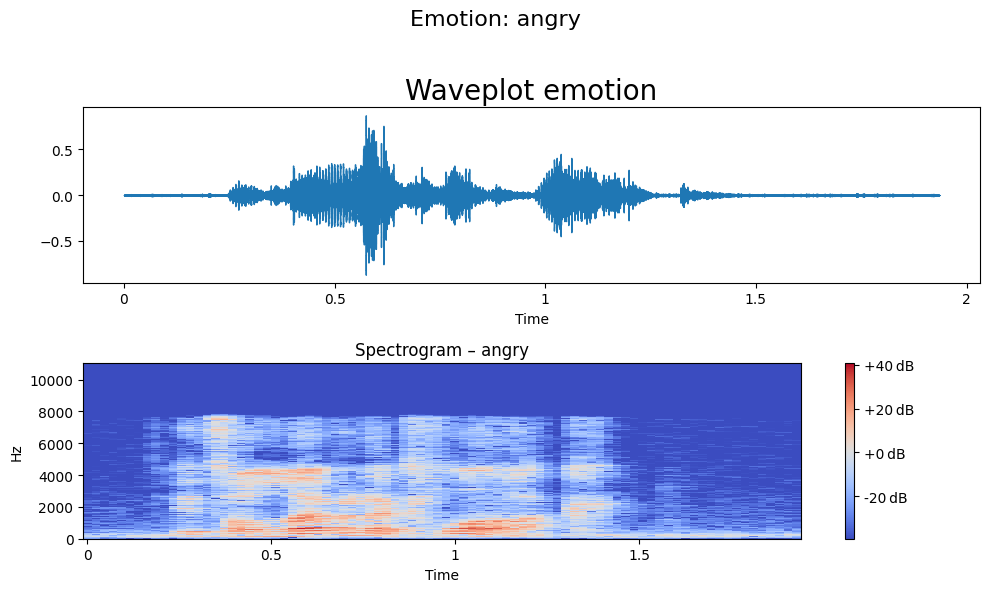

C:/Users/lenovo/Anomaly detection Project/Emotional-aware-chatbot/data/processed/balanced_dataset/neutral_crema_d_1001_ieo_neu_xx.wav


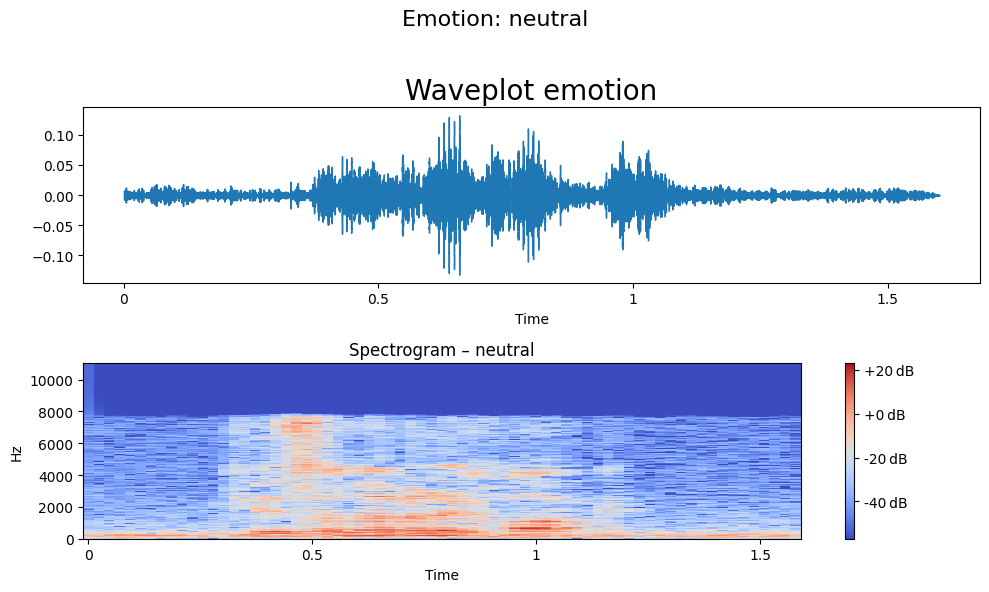

C:/Users/lenovo/Anomaly detection Project/Emotional-aware-chatbot/data/processed/balanced_dataset/disgust_crema_d_1001_ieo_dis_hi.wav


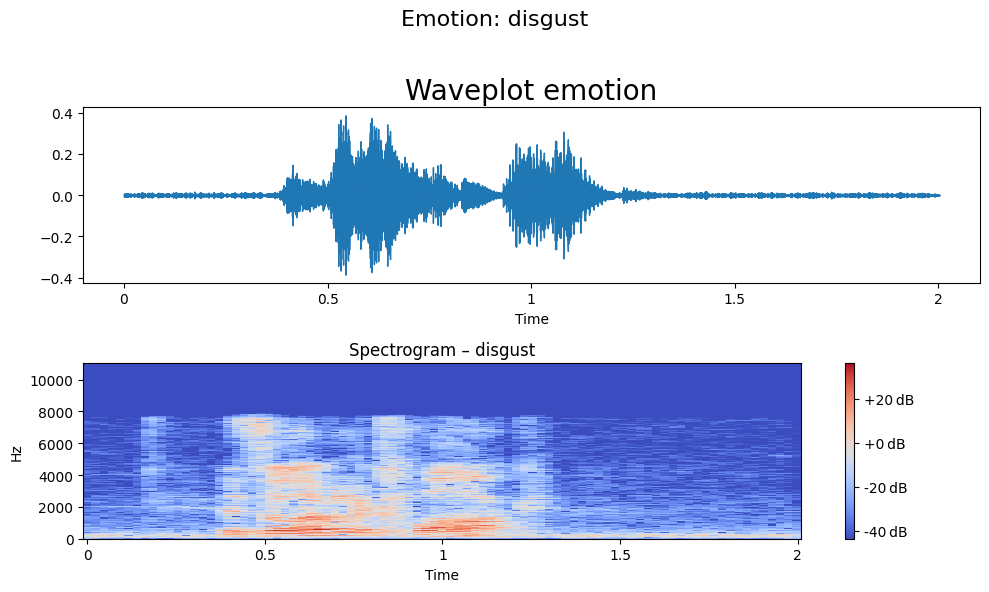

C:/Users/lenovo/Anomaly detection Project/Emotional-aware-chatbot/data/processed/balanced_dataset/happy_crema_d_1001_ieo_hap_hi.wav


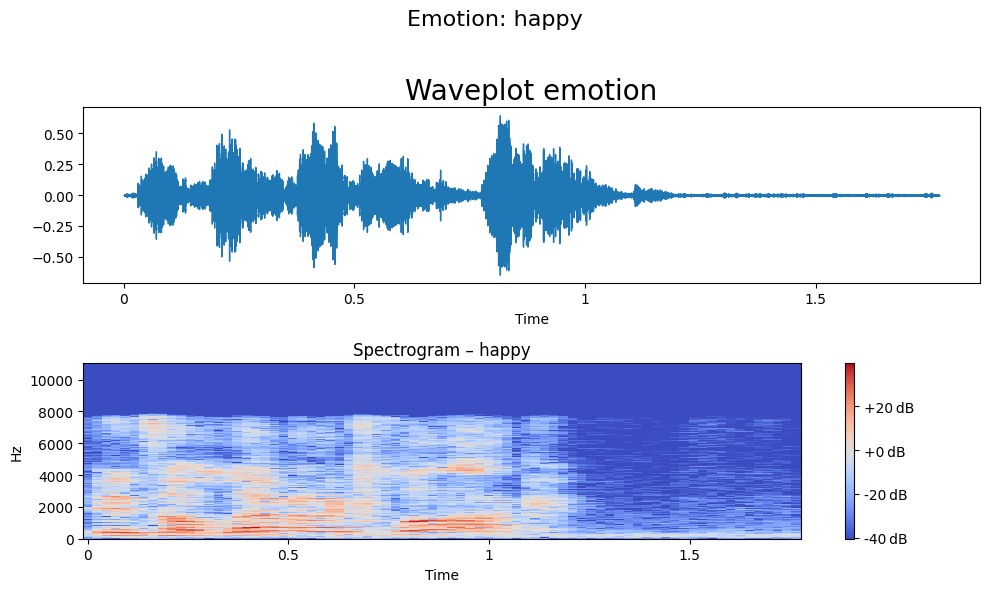

C:/Users/lenovo/Anomaly detection Project/Emotional-aware-chatbot/data/processed/balanced_dataset/fearful_crema_d_1001_ieo_fea_hi.wav


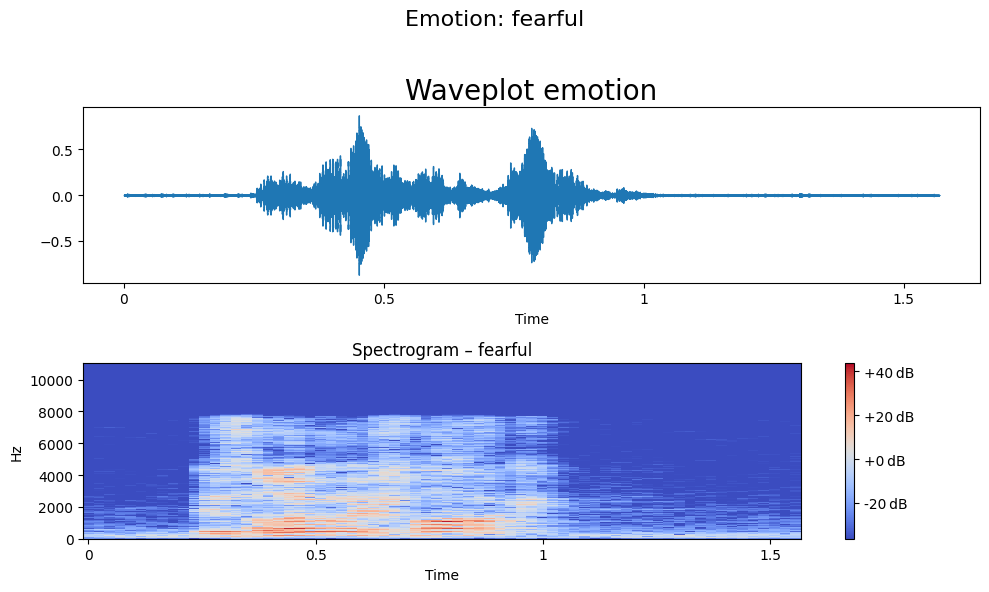

C:/Users/lenovo/Anomaly detection Project/Emotional-aware-chatbot/data/processed/balanced_dataset/sad_crema_d_1001_ieo_sad_hi.wav


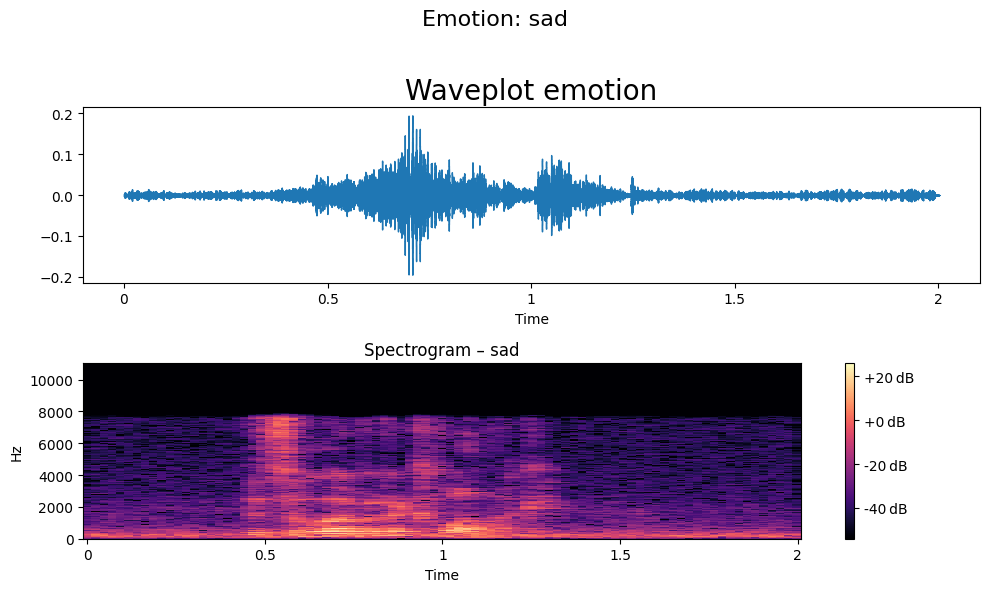

C:/Users/lenovo/Anomaly detection Project/Emotional-aware-chatbot/data/processed/balanced_dataset/surprised_ravdess_03-01-08-01-01-01-01_aug_noise0.002_45178.wav


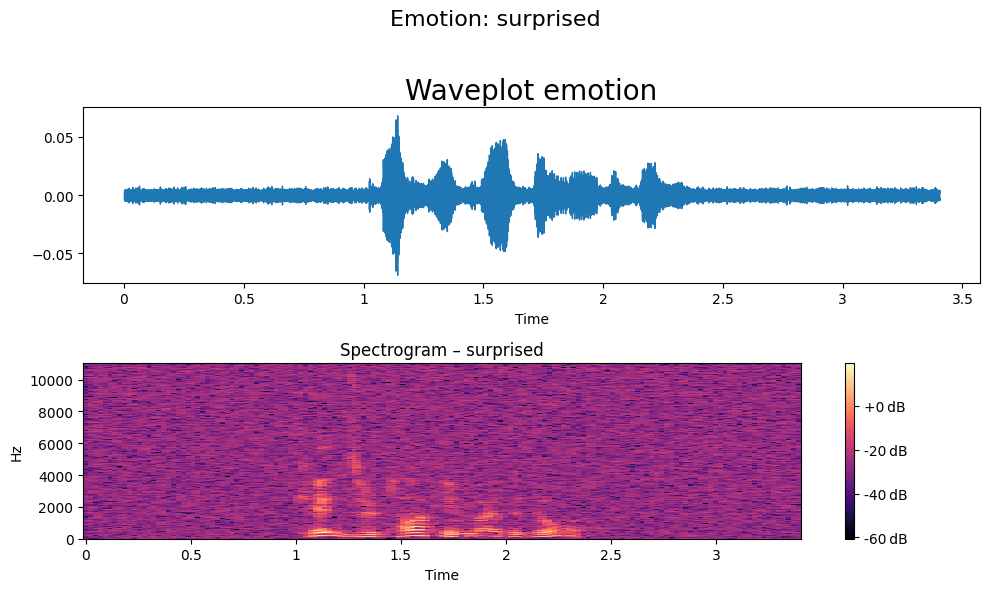

C:/Users/lenovo/Anomaly detection Project/Emotional-aware-chatbot/data/processed/balanced_dataset/calm_ravdess_03-01-02-01-01-01-01_aug_ts0.90_noise0.005_29971.wav


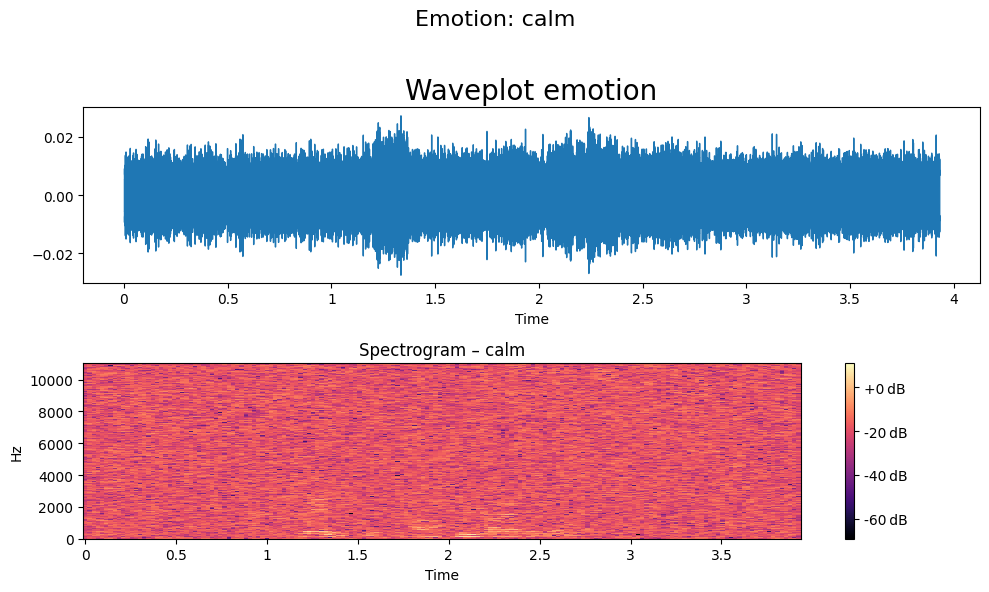

In [22]:
emotions = ['angry','neutral','disgust','happy','fearful','sad','surprised','calm']
for emotion in emotions:
    # Filter one audio file for this emotion
    filtered_path = df['filepath'][df['emotion'] == emotion]
    if not filtered_path.empty:
        path = filtered_path.iloc[1]
    print(path)
    # Load audio
    data, sr = librosa.load(path)

    # Setup subplots for wave + spectrogram
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))
    fig.suptitle(f"Emotion: {emotion}", fontsize=16)

    # Plot wave and spectrogram
    waveplot(axs[0], data, sr, emotion)
    spectrogram(axs[1], data, sr, emotion)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    display(Audio(path))